In [1268]:
import os
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Pre-Processing Data

In [1269]:
# absolute path to retrieve test files
path=os.path.abspath("Coding Challenges/Samsara/GPS Test Data/")

In [1270]:
# list of data files within GPS Test Data folder
all_files=os.listdir(path)
data_folders=[folder for folder in all_files if folder[0]!='.']
data_folders

['LI5-1843685M',
 'LI5-1834230M',
 'LI5-1843682M',
 'LI5-1843681M',
 'LI5-1834411M',
 'LI5-1834871M']

In [1271]:
# retrieve count of all .txt files with GPS Test Data
txt_files=[]
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".txt"):
             txt_files.append(file)
                
len(txt_files)

2180

In [1272]:
# dataframe to store initial relevant features from the GPS Test Data (.txt files)

# features:
# - Date: date log was created
# - Serial Number: unique serial number of gateway device
# - Total Time: total time to complete test (hr,min,sec)
# - GPS Detect Time: time to detect GPS module (sec)
# - GPS Enable Time: time to enable GPS module (sec)
# - GPS Signal Test Time: time to complete GPS signal test (sec)
# - TTFF: time to first fix time (sec)
# - SNR (1 - 8): Signal to noise ratio
# - GPS Signal Test: whether the GPS passed signal test

data = pd.DataFrame(columns=['Date', 'Serial Number', 'Total Time', 'GPS Detect Time', 
                             'GPS Enable Time', 'GPS Signal Test Time', 'TTFF', 'SNR1', 'SNR2', 'SNR3', 'SNR4',
                             'SNR5', 'SNR6', 'SNR7', 'SNR8', 'GPS Signal Test'])
data.head()

,Date,Serial Number,Total Time,GPS Detect Time,GPS Enable Time,GPS Signal Test Time,TTFF,SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8,GPS Signal Test


In [1273]:
# function to extract all relevant data from the GPS Test Data.
# run this function while parsing through each .txt file

def data_extraction(text):
    # null value = -100.0
#     instance_info = {'Date':' ', 'Serial Number':' ', 'Total Time':' ', 'GPS Detect Time':' ',
#                      'GPS Enable Time':' ', 'GPS Signal Test Time':' ', 'TTFF':' ','SNR1':' ', 
#                      'SNR2':' ', 'SNR3':' ', 'SNR4':' ','SNR5':' ', 'SNR6':' ', 'SNR7':' ', 
#                      'SNR8':' ', 'GPS Signal Test':' '}
    
    instance_info = {'Date':np.NaN, 'Serial Number':np.NaN, 'Total Time':np.NaN, 'GPS Detect Time':np.NaN,
                     'GPS Enable Time':np.NaN, 'GPS Signal Test Time':np.NaN, 'TTFF':np.NaN,'SNR1':np.NaN, 
                     'SNR2':np.NaN, 'SNR3':np.NaN, 'SNR4':np.NaN,'SNR5':np.NaN, 'SNR6':np.NaN, 'SNR7':np.NaN, 
                     'SNR8':np.NaN, 'GPS Signal Test': np.NaN}
    
    """ Extract Date """
    date_pattern = re.compile(r'\d{4}[-]\d{2}[-]\d{2}')
    date = re.match(date_pattern, text).group()
    instance_info['Date'] = date
    
    """ Extract Serial Number """
    serial_pattern = re.compile(r'Input SN : ([A-Z0-9]+-[A-Z0-9]+-[A-Z0-9]+)')
    serial = re.search(serial_pattern, text).group(1)
    instance_info['Serial Number'] = serial
    
    """ Extract Total Time """
    time_pattern= re.compile(r'Total Time ([0-9]+:[0-9]+:[0-9]+)')
    time = re.search(time_pattern, text).group(1)
    instance_info['Total Time'] = time
    
    """ Extract TTFF signal test
        TTFF = Time to First Fix
        TTFF - time interval between start up (power on) to the first valid nagivation 3D data point 
               derived from the simulation
    """
    ttff_pattern = re.compile(r'TTFF = ([0-9]+.[0-9]+)')
    ttff = re.search(ttff_pattern, text).group(1)
    instance_info['TTFF'] = float(ttff)
    
    """ Extract the GPS Module Detect Time  """
    detect_time_pattern = re.compile(r'Detect OK! Use time = ([0-9]+.[0-9]+)')
    detect_time = re.search(detect_time_pattern, text).group(1)
    instance_info['GPS Detect Time'] = float(detect_time)
    
    """ Extract the GPS Module Enable Time """
    enable_time_pattern = re.compile(r'Enable GPS Module OK! Use time = ([0-9]+.[0-9]+)')
    enable_time = re.search(enable_time_pattern, text).group(1)
    instance_info['GPS Enable Time'] = float(enable_time)
    
    """ Extract the GPS Signal Test Time """
    signal_test_time_pattern = re.compile(r'GPS Signal Test PASS! Use time = ([0-9]+.[0-9]+)')
    signal_test_time = re.search(signal_test_time_pattern, text).group(1)
    instance_info['GPS Signal Test Time'] = float(signal_test_time)

    """ Extract GPS Signal Test """
    gps_test_pattern = re.compile(r'GPS Signal Test ([A-z]{4,})')
    gps_test = re.search(gps_test_pattern, text).group(1)
    instance_info['GPS Signal Test'] = gps_test

    """ Extract SNR signal test
        SNR = Signal to Noise Ratio
        SNR - signal strength (higher value is better)
            - signal minus the noise
        
        The further a received signal is from the noise floor, 
        the better the signal quality. Signals close to the noise
        floor can be subject to data corruption,
    """
    for _ in range(1,9):
        snr_pattern = re.compile(r'SNR'+str(_)+' = ([0-9]+)') 
        snr = re.search(snr_pattern, text)
        
        if (snr_pattern == re.compile('SNR1 = ([0-9]+)')) & (snr != None):
            snr1 = snr.group(1)
            instance_info['SNR1'] = float(snr1)
        elif (snr_pattern == re.compile('SNR2 = ([0-9]+)')) & (snr !=  None):
            snr2 = snr.group(1)
            instance_info['SNR2'] = float(snr2)
        elif (snr_pattern == re.compile('SNR3 = ([0-9]+)')) & (snr != None):
            snr3 = snr.group(1)
            instance_info['SNR3'] = float(snr3)
        elif (snr_pattern == re.compile('SNR4 = ([0-9]+)')) & (snr != None):
            snr4 = snr.group(1)
            instance_info['SNR4'] = float(snr4)
        elif (snr_pattern == re.compile('SNR5 = ([0-9]+)')) & (snr != None):
            snr5 = snr.group(1)
            instance_info['SNR5'] = float(snr5)
        elif (snr_pattern == re.compile('SNR6 = ([0-9]+)')) & (snr != None):
            snr6 = snr.group(1)
            instance_info['SNR6'] = float(snr6)
        elif (snr_pattern == re.compile('SNR7 = ([0-9]+)')) & (snr != None):
            snr7 = snr.group(1)
            instance_info['SNR7'] = float(snr7)
        elif (snr_pattern == re.compile('SNR8 = ([0-9]+)')) & (snr != None):
            snr8 = snr.group(1)
            instance_info['SNR8'] = float(snr8)
    
    return instance_info

In [1274]:
# parsing through all .txt files within each data folder in GPS Test Data
# opening the file and calling 'data_extraction'

for file_folder in data_folders:
    for file in os.listdir(path+'/'+file_folder+'/PASS/'):
        if file.endswith('.txt'):
            with open(path+'/'+file_folder+'/PASS/'+file+'') as f:
                data = data.append(data_extraction(f.read()), ignore_index=True)

In [1275]:
data.head(2)

,Date,Serial Number,Total Time,GPS Detect Time,GPS Enable Time,GPS Signal Test Time,TTFF,SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8,GPS Signal Test
0,2018-04-20,GBXT-HMX-C3Z,00:01:21,680.897,3.57,40.76,38.0,44.0,44.0,44.0,44.0,NaN,NaN,NaN,NaN,PASS
1,2018-04-14,GVGG-P3N-S8H,00:01:13,2143.789,0.61,40.25,36.0,44.0,44.0,44.0,44.0,46.0,46.0,47.0,46.0,PASS


In [1276]:
# adding an additional feature
# converting Total Time to a numeric value (sec)
def convert_time_seconds(text):
    """ Convert Total Time to Seconds """
    ftr = [3600,60,1]
    seconds = sum([a*b for a,b in zip(ftr, map(int, text.split(':')))])
    return seconds

data['Total Time (sec)'] = data['Total Time'].apply(convert_time_seconds)

In [1277]:
print('Number of instance: ', data.shape[0])
print('Number of features: ', data.shape[1])

Number of instance:  2180
Number of features:  17


In [1278]:
data.describe()

,GPS Detect Time,GPS Enable Time,GPS Signal Test Time,TTFF,SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8,Total Time (sec)
count,2180.000000,2180.000000,2180.000000,2180.000000,2151.00000,2151.000000,2150.000000,2149.000000,1963.000000,1963.000000,1962.000000,1808.000000,2180.000000
mean,3585.844755,2.030627,47.031405,36.682569,41.97629,42.040911,42.128372,42.149372,41.607234,41.641365,41.305810,41.103429,79.761468
std,4040.925989,1.481934,26.203304,19.649152,4.66146,4.604770,4.541754,4.451218,4.817367,4.893646,5.245066,5.189580,29.288033
min,1.642000,0.600000,0.110000,0.000000,26.00000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,18.000000
25%,721.245750,0.610000,33.480000,29.000000,41.00000,41.000000,41.000000,41.000000,40.000000,40.000000,40.000000,40.000000,60.000000
50%,2241.373500,0.610000,37.735000,34.000000,43.00000,43.000000,43.000000,43.000000,42.000000,42.000000,42.000000,42.000000,75.000000
75%,5023.983750,3.570000,43.092500,37.000000,45.00000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,83.000000
max,22564.477000,3.830000,121.300000,120.000000,49.00000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,177.000000


In [1279]:
data.dtypes

Date                     object
Serial Number            object
Total Time               object
GPS Detect Time         float64
GPS Enable Time         float64
GPS Signal Test Time    float64
TTFF                    float64
SNR1                    float64
SNR2                    float64
SNR3                    float64
SNR4                    float64
SNR5                    float64
SNR6                    float64
SNR7                    float64
SNR8                    float64
GPS Signal Test          object
Total Time (sec)          int64
dtype: object

In [1280]:
data.isnull().sum()

Date                      0
Serial Number             0
Total Time                0
GPS Detect Time           0
GPS Enable Time           0
GPS Signal Test Time      0
TTFF                      0
SNR1                     29
SNR2                     29
SNR3                     30
SNR4                     31
SNR5                    217
SNR6                    217
SNR7                    218
SNR8                    372
GPS Signal Test           0
Total Time (sec)          0
dtype: int64

In [1161]:
# percentage of null values per feature is high to remove
print('Percentage of null SNR1 - SNR2: ', (29/2180)*100)
print('Percentage of null SNR3:        ', (30/2180)*100)
print('Percentage of null SNR4:        ', (31/2180)*100)
print('Percentage of null SNR5 - SNR6: ', (217/2180)*100)
print('Percentage of null SNR7:        ', (218/2180)*100)
print('Percentage of null SNR8:        ', (372/2180)*100)

Percentage of null SNR1 - SNR2:  1.3302752293577982
Percentage of null SNR3:         1.3761467889908259
Percentage of null SNR4:         1.4220183486238533
Percentage of null SNR5 - SNR6:  9.954128440366974
Percentage of null SNR7:         10.0
Percentage of null SNR8:         17.06422018348624


In [1317]:
# extracting initial dataset to csv in order to plot EDA
data.to_csv(r'/Users/danielmartin/Desktop/samsara_initial_data.csv', header=True)

## Exploratory Data Analysis

In [1281]:
# dataframe consisting of only instances of defective serial numbers
defective_serial_numbers = ['GN6U-8EF-FZ9', 'GPZ2-4A8-M7D', 'GSYM-W78-JX8', 'G8FF-3AH-VYX', 'GRV2-47G-N3B',
                            'GBZT-SPM-42E', 'GK2U-998-B72', 'GRVJ-YHK-92D', 'G8Y3-TJ8-SA8', 'GG42-C6K-82K',
                            'G2G9-WKX-4AD', 'GVSH-4VS-KRM', 'GHVT-NK3-JFZ', 'GJR7-UNB-RAB', 'GEFH-Z25-ZWX']

defective_data = data.loc[data['Serial Number'].isin(defective_serial_numbers), :]
defective_data

,Date,Serial Number,Total Time,GPS Detect Time,GPS Enable Time,GPS Signal Test Time,TTFF,SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8,GPS Signal Test,Total Time (sec)
1350,2018-04-04,GEFH-Z25-ZWX,00:02:26,824.166,0.60,120.060,119.0,42.0,42.0,42.0,42.0,41.0,40.0,33.0,41.0,PASS,146
1369,2018-04-04,GVSH-4VS-KRM,00:02:17,6514.009,0.60,120.050,119.0,44.0,43.0,44.0,44.0,44.0,43.0,44.0,44.0,PASS,137
1376,2018-04-04,G2G9-WKX-4AD,00:02:20,4848.140,3.57,120.090,119.0,41.0,41.0,40.0,41.0,40.0,40.0,41.0,40.0,PASS,140
1510,2018-04-04,GRV2-47G-N3B,00:02:48,393.932,3.58,120.200,120.0,39.0,39.0,39.0,39.0,NaN,NaN,NaN,NaN,PASS,168
1542,2018-04-04,GJR7-UNB-RAB,00:02:41,735.489,3.58,120.420,119.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,PASS,161
1609,2018-04-04,GSYM-W78-JX8,00:02:18,2965.074,0.60,120.720,120.0,46.0,46.0,47.0,46.0,43.0,43.0,43.0,44.0,PASS,138
1720,2018-04-04,G8FF-3AH-VYX,00:02:20,1716.300,3.57,120.230,120.0,31.0,31.0,31.0,31.0,32.0,32.0,31.0,28.0,PASS,140
1724,2018-04-04,G8Y3-TJ8-SA8,00:02:21,1562.072,3.58,120.150,119.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,PASS,141
1767,2018-04-30,GRVJ-YHK-92D,00:02:16,142.812,0.60,120.460,120.0,NaN,NaN,NaN,NaN,35.0,36.0,35.0,36.0,PASS,136
1816,2018-04-04,GN6U-8EF-FZ9,00:02:23,2792.650,0.60,120.301,120.0,40.0,40.0,40.0,40.0,41.0,41.0,41.0,41.0,PASS,143


In [1282]:
print('Number of instance: ', defective_data.shape[0])
print('Number of features: ', defective_data.shape[1])

Number of instance:  16
Number of features:  17


In [1283]:
# mean of SNR(1-8) values for Defective data
for _ in range(1,9):
    print('SNR'+str(_)+' Mean: ', round(defective_data['SNR'+str(_)].mean(),2))

SNR1 Mean:  40.21
SNR2 Mean:  40.07
SNR3 Mean:  40.21
SNR4 Mean:  40.29
SNR5 Mean:  40.14
SNR6 Mean:  40.07
SNR7 Mean:  39.64
SNR8 Mean:  39.0


In [1284]:
# replace null values with the mean of SNR
for _ in range(1,9):
    mean=round(defective_data['SNR'+str(_)].mean(),2)
    defective_data['SNR'+str(_)].fillna(mean, inplace=True)

In [1285]:
defective_data.isnull().sum()

Date                    0
Serial Number           0
Total Time              0
GPS Detect Time         0
GPS Enable Time         0
GPS Signal Test Time    0
TTFF                    0
SNR1                    0
SNR2                    0
SNR3                    0
SNR4                    0
SNR5                    0
SNR6                    0
SNR7                    0
SNR8                    0
GPS Signal Test         0
Total Time (sec)        0
dtype: int64

In [1286]:
# dataframe excluding the known defective serial numbers
clean_data = data.loc[~data['Serial Number'].isin(defective_serial_numbers), :]
clean_data.head(2)

,Date,Serial Number,Total Time,GPS Detect Time,GPS Enable Time,GPS Signal Test Time,TTFF,SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8,GPS Signal Test,Total Time (sec)
0,2018-04-20,GBXT-HMX-C3Z,00:01:21,680.897,3.57,40.76,38.0,44.0,44.0,44.0,44.0,NaN,NaN,NaN,NaN,PASS,81
1,2018-04-14,GVGG-P3N-S8H,00:01:13,2143.789,0.61,40.25,36.0,44.0,44.0,44.0,44.0,46.0,46.0,47.0,46.0,PASS,73


In [1287]:
print('Number of instance: ', clean_data.shape[0])
print('Number of features: ', clean_data.shape[1])

Number of instance:  2164
Number of features:  17


In [1288]:
# mean of SNR(1-8) values for Clean data
for _ in range(1,9):
    print('SNR'+str(_)+' Mean: ', round(clean_data['SNR'+str(_)].mean(),2))

SNR1 Mean:  41.99
SNR2 Mean:  42.05
SNR3 Mean:  42.14
SNR4 Mean:  42.16
SNR5 Mean:  41.62
SNR6 Mean:  41.65
SNR7 Mean:  41.32
SNR8 Mean:  41.12


In [1289]:
# replace null values with the mean of SNR
for _ in range(1,9):
    mean=round(clean_data['SNR'+str(_)].mean(),2)
    clean_data['SNR'+str(_)].fillna(mean, inplace=True)

In [1290]:
clean_data.isnull().sum()

Date                    0
Serial Number           0
Total Time              0
GPS Detect Time         0
GPS Enable Time         0
GPS Signal Test Time    0
TTFF                    0
SNR1                    0
SNR2                    0
SNR3                    0
SNR4                    0
SNR5                    0
SNR6                    0
SNR7                    0
SNR8                    0
GPS Signal Test         0
Total Time (sec)        0
dtype: int64

## Visualizations

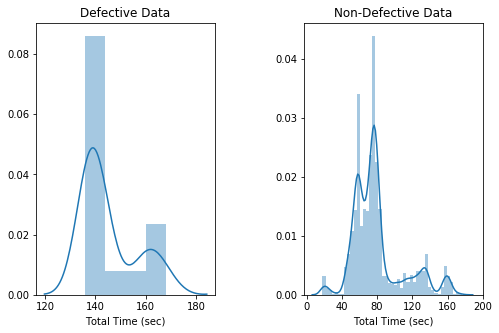

In [1291]:
# distribution plots of Total Time (sec) for both
# defective and non-defective data

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.title('Defective Data')
sns.distplot(a=defective_data['Total Time (sec)'])


plt.subplot(1,2,2)
plt.title('Non-Defective Data')
g=sns.distplot(a=clean_data['Total Time (sec)'])
g.set_xticks(np.linspace(0,200,6))

plt.subplots_adjust(wspace = 0.5, hspace = 0.3);

In [1292]:
# outliers - Total Time (sec) values 0-50
TT_outliers = clean_data.loc[data['Total Time (sec)']<=40, :]
TT_outliers.shape

(44, 17)

In [1293]:
# Ship to Vendors - Total Time (sec) values 50-120
TT_ship_to_vendor = clean_data.loc[(clean_data['Total Time (sec)']>40)&
                                (clean_data['Total Time (sec)']<=100), :]
TT_ship_to_vendor.shape

(1738, 17)

In [1294]:
# Screening - Total Time (sec) values 120-130
TT_screening = clean_data.loc[(clean_data['Total Time (sec)']>100)&
                           (clean_data['Total Time (sec)']<=130), :]
TT_screening.shape

(178, 17)

In [1295]:
# Return from Field - Total Time (sec) values >130
TT_return_from_field = clean_data.loc[clean_data['Total Time (sec)']>130, :]
TT_return_from_field.shape

(204, 17)

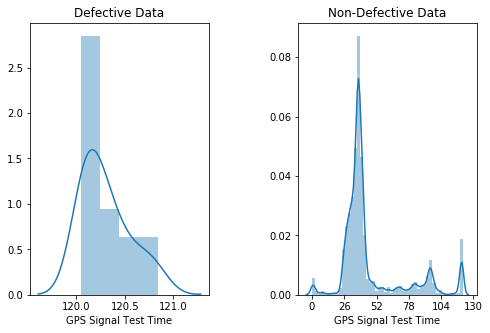

In [1296]:
# distribution plot of GPS Signal Test Time for both
# defective and non-defective data

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.title('Defective Data')
sns.distplot(a=defective_data['GPS Signal Test Time'])


plt.subplot(1,2,2)
plt.title('Non-Defective Data')
g=sns.distplot(a=clean_data['GPS Signal Test Time'])
g.set_xticks(np.linspace(0,130,6))

plt.subplots_adjust(wspace = 0.5, hspace = 0.3);

In [1297]:
# outliers - GPS Signal Test Time (sec) values 0-25
STT_outliers = clean_data.loc[data['GPS Signal Test Time']<26, :]
STT_outliers.shape

(120, 17)

In [1298]:
# Ship to Vendors - GPS Signal Test Time (sec) values 26-55
STT_ship_to_vendor = clean_data.loc[(clean_data['GPS Signal Test Time']>=26)&
                                (clean_data['GPS Signal Test Time']<=55), :]
STT_ship_to_vendor.shape

(1618, 17)

In [1299]:
# Screening - GPS Signal Test Time (sec) values 56-105
STT_screening = clean_data.loc[(clean_data['GPS Signal Test Time']>55)&
                           (clean_data['GPS Signal Test Time']<=105), :]
STT_screening.shape

(318, 17)

In [1300]:
# Return from Field - GPS Signal Test Time (sec) values >104
STT_return_from_field = clean_data.loc[clean_data['GPS Signal Test Time']>104, :]
STT_return_from_field.shape

(110, 17)

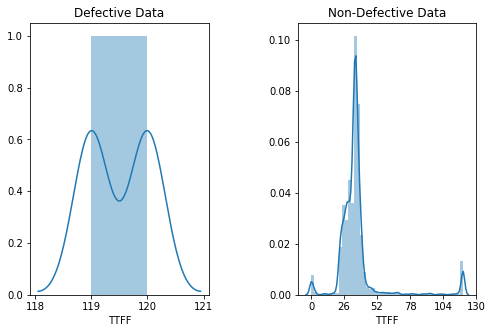

In [1301]:
# distribution plot of TTFF values for both
# defective and non-defective data

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.title('Defective Data')
sns.distplot(a=defective_data['TTFF'])

plt.subplot(1,2,2)
plt.title('Non-Defective Data')
g=sns.distplot(a=clean_data['TTFF'])
g.set_xticks(np.linspace(0,130,6))

plt.subplots_adjust(wspace = 0.5, hspace = 0.3);

In [1302]:
# outliers - TTFF (sec) values 0-25
TTFF_outliers = clean_data.loc[data['TTFF']<26, :]
TTFF_outliers.shape

(276, 17)

In [1303]:
# Ship to Vendors - GPS Signal Test Time (sec) values 26-55
TTFF_ship_to_vendor = clean_data.loc[(clean_data['TTFF']>=26)&
                                (clean_data['TTFF']<=55), :]
TTFF_ship_to_vendor.shape

(1768, 17)

In [1304]:
# Screening - GPS Signal Test Time (sec) values 56-105
TTFF_screening = clean_data.loc[(clean_data['TTFF']>55)&
                           (clean_data['TTFF']<=105), :]
TTFF_screening.shape

(45, 17)

In [1305]:
# Return from Field - GPS Signal Test Time (sec) values >104
TTFF_return_from_field = clean_data.loc[clean_data['TTFF']>105, :]
TTFF_return_from_field.shape

(75, 17)

## Analysis (Recommendation)

In [1306]:
# functions that will categorize the gateway devices in terms of 
# Total Time (sec), GPS Signal Test Time, and TTFF values

def total_time_rec(time):
    if time<=40:
        return 'outlier'
    elif (time>40)&(time<=100):
        return 'ship to vendor'
    elif (time>100)&(time<=130):
        return 'screening'
    else:
        return 'return from field'
    
def signal_time_rec(time):
    if time<26:
        return 'outlier'
    elif (time>=26)&(time<=55):
        return 'ship to vendor'
    elif (time>55)&(time<=105):
        return 'screening'
    else:
        return 'return from field'
    
def ttff_rec(ttff):
    if ttff<26:
        return 'outlier'
    elif (ttff>=26)&(ttff<=55):
        return 'ship to vendor'
    elif (ttff>55)&(ttff<=105):
        return 'screening'
    else:
        return 'return from field'

In [1307]:
# applying the functions above to every instance in the dataset
data['Total Time Rec'] = data['Total Time (sec)'].apply(total_time_rec)
data['Signal Time Rec'] = data['GPS Signal Test Time'].apply(signal_time_rec)
data['TTFF Rec'] = data['TTFF'].apply(ttff_rec)

In [1308]:
# function for my final recommendation
# returning the mode value for Total Time (sec), GPS Signal Test Time, and TTFF
# - if the values are split evenly or if the gateway is categorized as an outlier
#   my final recommendation is to screen the device an additional time

def mode_func(row):
    if len(row[['Total Time Rec', 'Signal Time Rec', 'TTFF Rec']].value_counts()) > 2:
        return 'screening'
    elif row[['Total Time Rec', 'Signal Time Rec', 'TTFF Rec']].mode()[0] == 'outlier':
        return 'screening'
    else:
        return row[['Total Time Rec', 'Signal Time Rec', 'TTFF Rec']].mode() 

In [1309]:
data['final rec'] = data.apply(mode_func, axis = 1)
data.head()

,Date,Serial Number,Total Time,GPS Detect Time,GPS Enable Time,GPS Signal Test Time,TTFF,SNR1,SNR2,SNR3,...,SNR5,SNR6,SNR7,SNR8,GPS Signal Test,Total Time (sec),Total Time Rec,Signal Time Rec,TTFF Rec,final rec
0,2018-04-20,GBXT-HMX-C3Z,00:01:21,680.897,3.57,40.76,38.0,44.0,44.0,44.0,...,NaN,NaN,NaN,NaN,PASS,81,ship to vendor,ship to vendor,ship to vendor,ship to vendor
1,2018-04-14,GVGG-P3N-S8H,00:01:13,2143.789,0.61,40.25,36.0,44.0,44.0,44.0,...,46.0,46.0,47.0,46.0,PASS,73,ship to vendor,ship to vendor,ship to vendor,ship to vendor
2,2018-04-20,GG95-8CE-W8M,00:02:15,570.095,3.58,93.90,26.0,44.0,44.0,44.0,...,41.0,41.0,41.0,41.0,PASS,135,return from field,screening,ship to vendor,screening
3,2018-04-20,GDJK-B45-V6F,00:01:22,2158.762,3.57,38.01,34.0,42.0,42.0,42.0,...,43.0,42.0,43.0,41.0,PASS,82,ship to vendor,ship to vendor,ship to vendor,ship to vendor
4,2018-04-20,GHRT-RF9-E9K,00:00:59,10.912,3.56,36.40,33.0,43.0,43.0,43.0,...,NaN,NaN,NaN,NaN,PASS,59,ship to vendor,ship to vendor,ship to vendor,ship to vendor


In [1311]:
# counts per final recommendation value
data.groupby('final rec')['Serial Number'].count()

final rec
return from field     123
screening             407
ship to vendor       1650
Name: Serial Number, dtype: int64

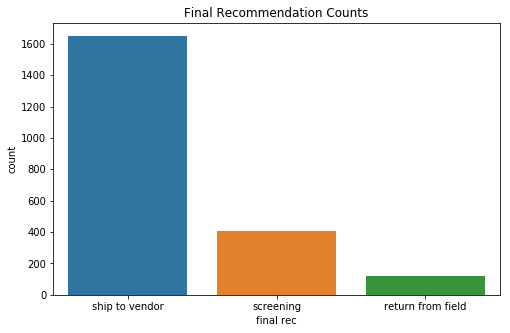

In [1315]:
# countplot displaying the counts of final recommendations

plt.figure(figsize=(8,5))
plt.title('Final Recommendation Counts')
sns.countplot(data['final rec']);

In [1318]:
# extracting final dataset to csv in order to plot EDA
data.to_csv(r'/Users/danielmartin/Desktop/samsara_final_data.csv', header=True)

### Additional EDA

In [1316]:
# The following plots did not demonstrate much of an association
# between defective and non-defective gateways when compared to 
# Total Time (sec), GPS Signal Test Time, and TTFF features.
# For this reason I excluded the SNR (signal to noise ration)
# values from the final recommendation. 

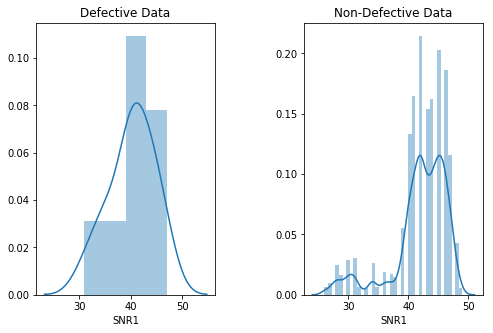

In [887]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.title('Defective Data')
sns.distplot(a=defective_data['SNR1'])

plt.subplot(1,2,2)
plt.title('Non-Defective Data')
sns.distplot(a=clean_data['SNR1'])

plt.subplots_adjust(wspace = 0.5, hspace = 0.3);

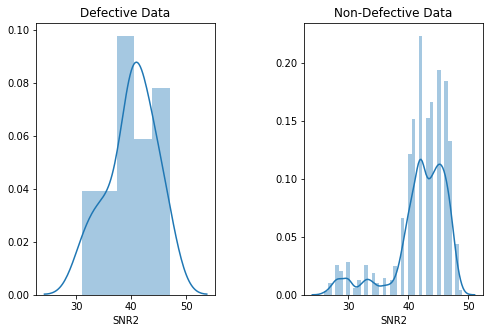

In [888]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.title('Defective Data')
sns.distplot(a=defective_data['SNR2'])

plt.subplot(1,2,2)
plt.title('Non-Defective Data')
sns.distplot(a=clean_data['SNR2'])

plt.subplots_adjust(wspace = 0.5, hspace = 0.3);

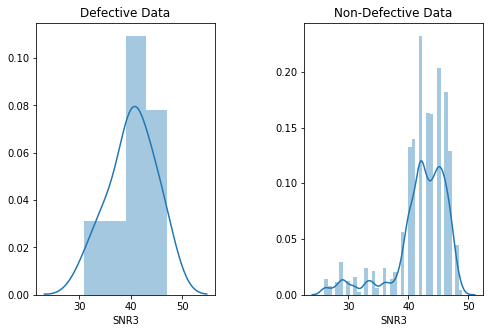

In [889]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.title('Defective Data')
sns.distplot(a=defective_data['SNR3'])

plt.subplot(1,2,2)
plt.title('Non-Defective Data')
sns.distplot(a=clean_data['SNR3'])

plt.subplots_adjust(wspace = 0.5, hspace = 0.3);

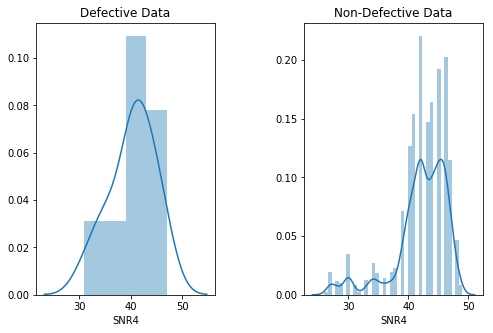

In [890]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.title('Defective Data')
sns.distplot(a=defective_data['SNR4'])

plt.subplot(1,2,2)
plt.title('Non-Defective Data')
sns.distplot(a=clean_data['SNR4'])

plt.subplots_adjust(wspace = 0.5, hspace = 0.3);

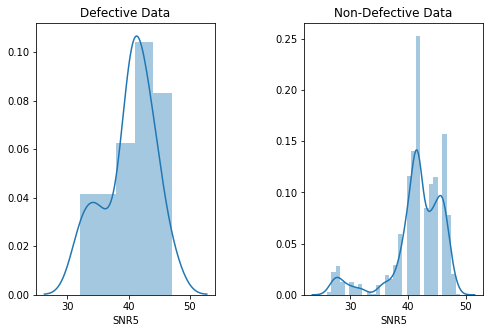

In [891]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.title('Defective Data')
sns.distplot(a=defective_data['SNR5'])

plt.subplot(1,2,2)
plt.title('Non-Defective Data')
sns.distplot(a=clean_data['SNR5'])

plt.subplots_adjust(wspace = 0.5, hspace = 0.3);

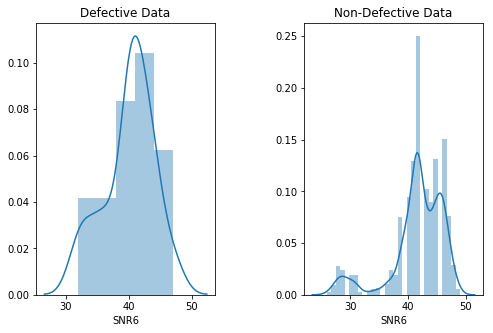

In [892]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.title('Defective Data')
sns.distplot(a=defective_data['SNR6'])

plt.subplot(1,2,2)
plt.title('Non-Defective Data')
sns.distplot(a=clean_data['SNR6'])

plt.subplots_adjust(wspace = 0.5, hspace = 0.3);

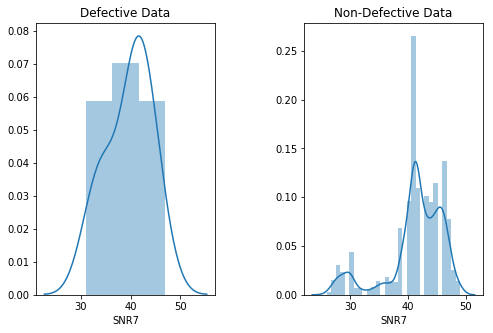

In [893]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.title('Defective Data')
sns.distplot(a=defective_data['SNR7'])

plt.subplot(1,2,2)
plt.title('Non-Defective Data')
sns.distplot(a=clean_data['SNR7'])

plt.subplots_adjust(wspace = 0.5, hspace = 0.3);

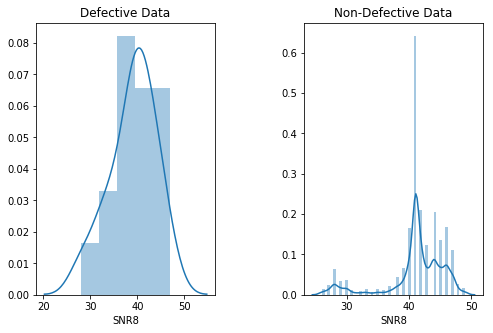

In [894]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.title('Defective Data')
sns.distplot(a=defective_data['SNR8'])

plt.subplot(1,2,2)
plt.title('Non-Defective Data')
sns.distplot(a=clean_data['SNR8'])

plt.subplots_adjust(wspace = 0.5, hspace = 0.3);

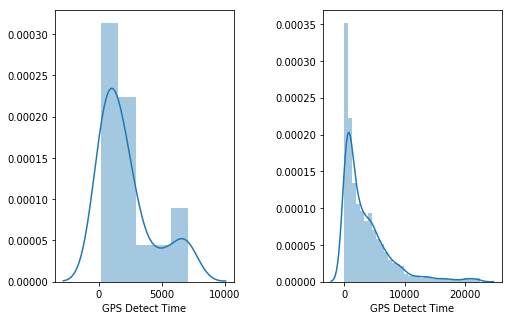

In [713]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.title('Defective Data')
sns.distplot(a=defective_data['GPS Detect Time'])

plt.subplot(1,2,2)
plt.title('Non-Defective Data')
sns.distplot(a=clean_data['GPS Detect Time'])

plt.subplots_adjust(wspace = 0.5, hspace = 0.3);

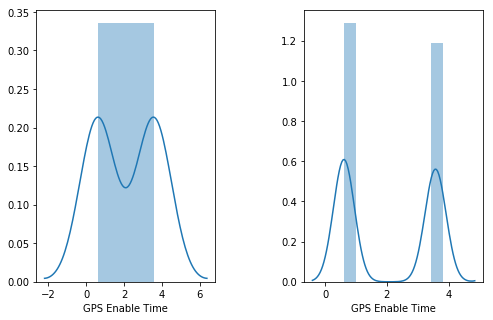

In [719]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.title('Defective Data')
sns.distplot(a=defective_data['GPS Enable Time'])

plt.subplot(1,2,2)
plt.title('Non-Defective Data')
sns.distplot(a=clean_data['GPS Enable Time'])

plt.subplots_adjust(wspace = 0.5, hspace = 0.3);